# Installing the NLTK library and importing all the necessary package

In [1]:
pip install -U nltk

Note: you may need to restart the kernel to use updated packages.


In [4]:
#importing packages to be used

import nltk
import pandas as pd
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Loading and cleaning the data 

In [5]:
text_data = pd.read_csv("SMSSpamCollection.tsv", sep="\t", header=None)
text_data.head()

,0,1
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [6]:
#column names are stored as 0 and 1, we need to change that 
text_data.columns = ['label','text_msg']

text_data.head()

,label,text_msg
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


# Explore the data set to see structure 

In [7]:
#check the total number of rows and column  

print("Total number of row is", len(text_data))
print("Total number of column is", len(text_data.columns))

Total number of row is 5568
Total number of column is 2


In [15]:
#check to see the share of spam and ham 

print("The text_data has", len(text_data[text_data['label']=='spam']), "spam"
     " and", len(text_data[text_data['label']=='ham']), "ham")

The text_data has 746 spam and 4822 ham


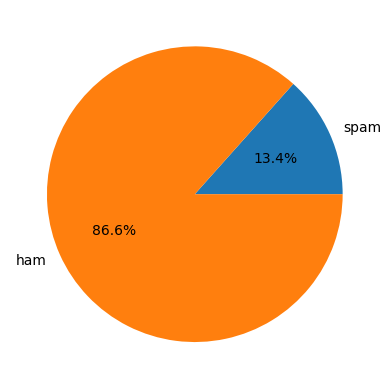

In [126]:
#Pie plot of the share of spam and ham 
pyplot.pie([len(text_data[text_data['label']=='spam']),
            len(text_data[text_data['label']=='ham'])], 
           labels = ['spam','ham'], autopct='%1.1f%%')
pyplot.show() 

In [8]:
#check for NA and Null values 

print("There are ", text_data['label'].isnull().sum(), " null values in the label column")
print("There are ", text_data['text_msg'].isnull().sum(), " null values in the text_msg column")
print("There are ", text_data['label'].isna().sum(), " NA values in the label column")
print("There are ", text_data['text_msg'].isna().sum(), " NA values in the text_msg column")

There are  0  null values in the label column
There are  0  null values in the text_msg column
There are  0  NA values in the label column
There are  0  NA values in the text_msg column


# Getting the text data ready for the machine learning model

To achieve this on the text_msg column I will:
1) Remove Punctuations 
2) Tokenize 
3) Remove stopwords
4) Lemmatize(I could also use a Stemmer)

In [127]:
#importing the string 
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

### Removing punctuation from the dataset using the string library

In [16]:
 
#defining the function that takes in text and returns it without punctuation
def punct_remove(text):
    no_punct = "".join([word for word in text if word not in string.punctuation])
    return no_punct


#applying the function to return on a new column so as to visualize result 
text_data['no_punct_text'] = text_data['text_msg'].apply(lambda x: punct_remove(x))

text_data.head()

,label,text_msg,no_punct_text
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL


### Tokenizing the text with no punctuation

In [17]:
import re
#defining the function to split the words in no_punct_text coloumn 
def tokenize(text):
    token_text = re.split('\W+', text)
    return token_text

#applying the function to return on a new column so as to visualize result 
text_data['tokenized_text'] = text_data['no_punct_text'].apply(lambda x: tokenize(x.lower()))
text_data.head()

,label,text_msg,no_punct_text,tokenized_text
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...,"[ive, been, searching, for, the, right, words,..."
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l..."
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...,"[even, my, brother, is, not, like, to, speak, ..."
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]"


In [19]:
#Remove stop word as they add no value when used in the model 

#using the nltk english stopwords package 
stop_word = nltk.corpus.stopwords.words('english')

#defining the function to remove stop words
def remove_stopwords(token_words):
    words = [word for word in token_words if word not in stop_word]
    return words

#applying the function to return on a new column so as to visualize result 
text_data['no_stop_word'] = text_data['tokenized_text'].apply(lambda x: remove_stopwords(x))
text_data.head()

,label,text_msg,no_punct_text,tokenized_text,no_stop_word
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...,"[ive, been, searching, for, the, right, words,...","[ive, searching, right, words, thank, breather..."
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t..."
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...,"[even, my, brother, is, not, like, to, speak, ...","[even, brother, like, speak, treat, like, aids..."
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]"


In [21]:
#lemmatizing the text with no stop word

#instantiating the word lemmatizer from the nltk library
lem = nltk.WordNetLemmatizer()

#defining a function to lemmatize the text
def lemming(no_stop_word):
    lem_words = [lem.lemmatize(word) for word in no_stop_word]
    return lem_words

#applying the function to return on a new column so as to visualize result 
text_data['lemmatized_word'] = text_data['no_stop_word'].apply(lambda x: lemming(x))
text_data.head()


,label,text_msg,no_punct_text,tokenized_text,no_stop_word,lemmatized_word
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...,"[ive, been, searching, for, the, right, words,...","[ive, searching, right, words, thank, breather...","[ive, searching, right, word, thank, breather,..."
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, go, usf, life, around, though]"
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...,"[even, my, brother, is, not, like, to, speak, ...","[even, brother, like, speak, treat, like, aids...","[even, brother, like, speak, treat, like, aid,..."
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]","[date, sunday]"


In [33]:
#Optimizing the code to clean and lemmatize the text_msg with one function 

def clean_lem_text(text_msg):
    no_punct_text = "".join([text.lower() for text in text_msg if text not in string.punctuation])
    token_text = re.split('\W+', no_punct_text)
    cleaned_text = [lem.lemmatize(text) for text in token_text if text not in stop_word]
    return cleaned_text



In [31]:
#Drop columns from the previously cleaned data set
#text_data = text_data.drop(['no_punct_text','tokenized_text','no_stop_word','lemmatized_word'], axis=1)
text_data.head()

,label,text_msg
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [34]:
#applying the function to return on a new column so as to visualize result
text_data['clean_text'] = text_data['text_msg'].apply(lambda x: clean_lem_text(x))
text_data.head()

,label,text_msg,clean_text
0,ham,I've been searching for the right words to tha...,"[ive, searching, right, word, thank, breather,..."
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, 2, wkly, comp, win, fa, cup, fin..."
2,ham,"Nah I don't think he goes to usf, he lives aro...","[nah, dont, think, go, usf, life, around, though]"
3,ham,Even my brother is not like to speak with me. ...,"[even, brother, like, speak, treat, like, aid,..."
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,"[date, sunday]"


# Feature Engineering: Creating features for the dataset

Creating three new features for the data set


In [72]:
#Calculate the punctuations % in each row of text_msg

def punct_perc(text_msg):
    count = sum([1 for word in text_msg if word in string.punctuation])
    return round(count/(len(text_msg) - text_msg.count(" ")),2)*100




In [78]:
#count the number of abbreviated words/slangs in each row of text_msg
#Thanks to MAGUETTE MBAYE for providing a list @ https://www.kaggle.com/code/nmaguette/up-to-date-list-of-slangs-for-text-preprocessing
abbreviations = {
    "$" : " dollar ",
    "€" : " euro ",
    "4ao" : "for adults only",
    "a.m" : "before midday",
    "a3" : "anytime anywhere anyplace",
    "aamof" : "as a matter of fact",
    "acct" : "account",
    "adih" : "another day in hell",
    "afaic" : "as far as i am concerned",
    "afaict" : "as far as i can tell",
    "afaik" : "as far as i know",
    "afair" : "as far as i remember",
    "afk" : "away from keyboard",
    "app" : "application",
    "approx" : "approximately",
    "apps" : "applications",
    "asap" : "as soon as possible",
    "asl" : "age, sex, location",
    "atk" : "at the keyboard",
    "ave." : "avenue",
    "aymm" : "are you my mother",
    "ayor" : "at your own risk", 
    "b&b" : "bed and breakfast",
    "b+b" : "bed and breakfast",
    "b.c" : "before christ",
    "b2b" : "business to business",
    "b2c" : "business to customer",
    "b4" : "before",
    "b4n" : "bye for now",
    "b@u" : "back at you",
    "bae" : "before anyone else",
    "bak" : "back at keyboard",
    "bbbg" : "bye bye be good",
    "bbc" : "british broadcasting corporation",
    "bbias" : "be back in a second",
    "bbl" : "be back later",
    "bbs" : "be back soon",
    "be4" : "before",
    "bfn" : "bye for now",
    "blvd" : "boulevard",
    "bout" : "about",
    "brb" : "be right back",
    "bros" : "brothers",
    "brt" : "be right there",
    "bsaaw" : "big smile and a wink",
    "btw" : "by the way",
    "bwl" : "bursting with laughter",
    "c/o" : "care of",
    "cet" : "central european time",
    "cf" : "compare",
    "cia" : "central intelligence agency",
    "csl" : "can not stop laughing",
    "cu" : "see you",
    "cul8r" : "see you later",
    "cv" : "curriculum vitae",
    "cwot" : "complete waste of time",
    "cya" : "see you",
    "cyt" : "see you tomorrow",
    "dae" : "does anyone else",
    "dbmib" : "do not bother me i am busy",
    "diy" : "do it yourself",
    "dm" : "direct message",
    "dwh" : "during work hours",
    "e123" : "easy as one two three",
    "eet" : "eastern european time",
    "eg" : "example",
    "embm" : "early morning business meeting",
    "encl" : "enclosed",
    "encl." : "enclosed",
    "etc" : "and so on",
    "faq" : "frequently asked questions",
    "fawc" : "for anyone who cares",
    "fb" : "facebook",
    "fc" : "fingers crossed",
    "fig" : "figure",
    "fimh" : "forever in my heart",
    "fml" : "fuck my life",
    "ft." : "feet",
    "ft" : "featuring",
    "ftl" : "for the loss",
    "ftw" : "for the win",
    "fu" : "fuck you",
    "fwiw" : "for what it is worth",
    "fyi" : "for your information",
    "g9" : "genius",
    "gahoy" : "get a hold of yourself",
    "gal" : "get a life",
    "gcse" : "general certificate of secondary education",
    "gfn" : "gone for now",
    "gg" : "good game",
    "gl" : "good luck",
    "glhf" : "good luck have fun",
    "gmt" : "greenwich mean time",
    "gmta" : "great minds think alike",
    "gn" : "good night",
    "g.o.a.t" : "greatest of all time",
    "goat" : "greatest of all time",
    "goi" : "get over it",
    "gps" : "global positioning system",
    "gr8" : "great",
    "gratz" : "congratulations",
    "gyal" : "girl",
    "h&c" : "hot and cold",
    "hp" : "horsepower",
    "hr" : "hour",
    "hrh" : "his royal highness",
    "ht" : "height",
    "ibrb" : "i will be right back",
    "ic" : "i see",
    "icq" : "i seek you",
    "icymi" : "in case you missed it",
    "idc" : "i do not care",
    "idgadf" : "i do not give a damn fuck",
    "idgaf" : "i do not give a fuck",
    "idk" : "i do not know",
    "ie" : "that is",
    "i.e" : "that is",
    "ifyp" : "i feel your pain",
    "IG" : "instagram",
    "iirc" : "if i remember correctly",
    "ilu" : "i love you",
    "ily" : "i love you",
    "imho" : "in my humble opinion",
    "imo" : "in my opinion",
    "imu" : "i miss you",
    "iow" : "in other words",
    "irl" : "in real life",
    "j4f" : "just for fun",
    "jic" : "just in case",
    "jk" : "just kidding",
    "jsyk" : "just so you know",
    "l8r" : "later",
    "lb" : "pound",
    "lbs" : "pounds",
    "ldr" : "long distance relationship",
    "lmao" : "laugh my ass off",
    "lmfao" : "laugh my fucking ass off",
    "lol" : "laughing out loud",
    "ltd" : "limited",
    "ltns" : "long time no see",
    "m8" : "mate",
    "mf" : "motherfucker",
    "mfs" : "motherfuckers",
    "mfw" : "my face when",
    "mofo" : "motherfucker",
    "mph" : "miles per hour",
    "mr" : "mister",
    "mrw" : "my reaction when",
    "ms" : "miss",
    "mte" : "my thoughts exactly",
    "nagi" : "not a good idea",
    "nah" : "No",
    "nbc" : "national broadcasting company",
    "nbd" : "not big deal",
    "nfs" : "not for sale",
    "ngl" : "not going to lie",
    "nhs" : "national health service",
    "nrn" : "no reply necessary",
    "nsfl" : "not safe for life",
    "nsfw" : "not safe for work",
    "nth" : "nice to have",
    "nvr" : "never",
    "nyc" : "new york city",
    "oc" : "original content",
    "og" : "original",
    "ohp" : "overhead projector",
    "oic" : "oh i see",
    "omdb" : "over my dead body",
    "omg" : "oh my god",
    "omw" : "on my way",
    "p.a" : "per annum",
    "p.m" : "after midday",
    "pm" : "prime minister",
    "poc" : "people of color",
    "pov" : "point of view",
    "pp" : "pages",
    "ppl" : "people",
    "prw" : "parents are watching",
    "ps" : "postscript",
    "pt" : "point",
    "ptb" : "please text back",
    "pto" : "please turn over",
    "qpsa" : "what happens", 
    "ratchet" : "rude",
    "rbtl" : "read between the lines",
    "rlrt" : "real life retweet", 
    "rofl" : "rolling on the floor laughing",
    "roflol" : "rolling on the floor laughing out loud",
    "rotflmao" : "rolling on the floor laughing my ass off",
    "rt" : "retweet",
    "ruok" : "are you ok",
    "sfw" : "safe for work",
    "sk8" : "skate",
    "smh" : "shake my head",
    "sq" : "square",
    "srsly" : "seriously", 
    "ssdd" : "same stuff different day",
    "tbh" : "to be honest",
    "tbs" : "tablespooful",
    "tbsp" : "tablespooful",
    "tfw" : "that feeling when",
    "thks" : "thank you",
    "tho" : "though",
    "thx" : "thank you",
    "tia" : "thanks in advance",
    "til" : "today i learned",
    "tl;dr" : "too long i did not read",
    "tldr" : "too long i did not read",
    "tmb" : "tweet me back",
    "tntl" : "trying not to laugh",
    "ttyl" : "talk to you later",
    "u" : "you",
    "u2" : "you too",
    "u4e" : "yours for ever",
    "utc" : "coordinated universal time",
    "w/" : "with",
    "w/o" : "without",
    "w8" : "wait",
    "wassup" : "what is up",
    "wb" : "welcome back",
    "wtf" : "what the fuck",
    "wtg" : "way to go",
    "wtpa" : "where the party at",
    "wuf" : "where are you from",
    "wuzup" : "what is up",
    "wywh" : "wish you were here",
    "yd" : "yard",
    "ygtr" : "you got that right",
    "ynk" : "you never know",
    "zzz" : "sleeping bored and tired"
}

def abbrv_perc(text_msg):
    count = sum([1 for char in text_msg.lower() if char in abbreviations])
    return round(count/(len(text_msg) - text_msg.count(" ")), 2)*100

In [79]:
#Creating the new features with the above functions 

text_data['text_punct%'] = text_data['text_msg'].apply(lambda x: punct_perc(x))
text_data['abbrv_text%'] = text_data['text_msg'].apply(lambda x: abbrv_perc(x))
text_data['text_len'] = text_data['text_msg'].apply(lambda x: len(x)-x.count(" "))

text_data.head()

,label,text_msg,clean_text,text_punct%,abbrv_text%,text_len
0,ham,I've been searching for the right words to tha...,"[ive, searching, right, word, thank, breather,...",3.0,3.0,160
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, 2, wkly, comp, win, fa, cup, fin...",5.0,2.0,128
2,ham,"Nah I don't think he goes to usf, he lives aro...","[nah, dont, think, go, usf, life, around, though]",4.0,6.0,49
3,ham,Even my brother is not like to speak with me. ...,"[even, brother, like, speak, treat, like, aid,...",3.0,0.0,62
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,"[date, sunday]",7.0,4.0,28


In [62]:
print("The max % of punctuated text_msg is", max(text_data['text_punct%']),
      "\nThe max abbreviated text_msg length is",max(text_data['abbrv_text_len']),
      "\nThe max text_msg length is",max(text_data['text_len']))

The max % of punctuated text_msg is 100.0 
The max abbreviated text_msg length is 33.0 
The max text_msg length is 740


In [64]:
#viewing the max % of punctuated text_msg of 100.0
text_data[text_data['text_punct%']==100]

,label,text_msg,clean_text,text_punct%,abbrv_text_len,text_len
3372,ham,:),"[, ]",100.0,0.0,2
4820,ham,:-) :-),"[, ]",100.0,0.0,6


# Evaluate created features

In [65]:
from matplotlib import pyplot
import numpy as np
%matplotlib inline

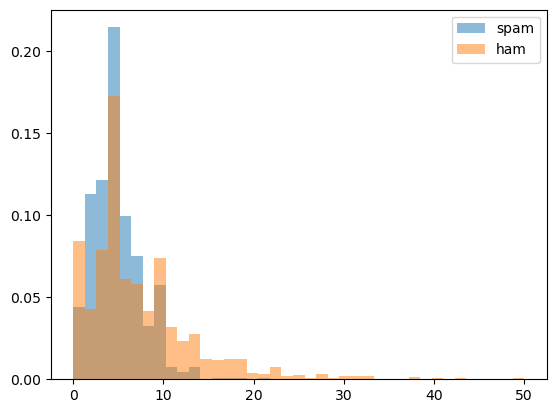

In [66]:
#plot a normalized histogram of the abbreviation percentage 

bins = np.linspace(0, 50, 40)

pyplot.hist(text_data[text_data['label'] == 'spam']['text_punct%'], bins, alpha=0.5, density=True, label='spam')
pyplot.hist(text_data[text_data['label'] == 'ham']['text_punct%'], bins, alpha=0.5, density=True, label='ham')    
pyplot.legend(loc='upper right')
pyplot.show()

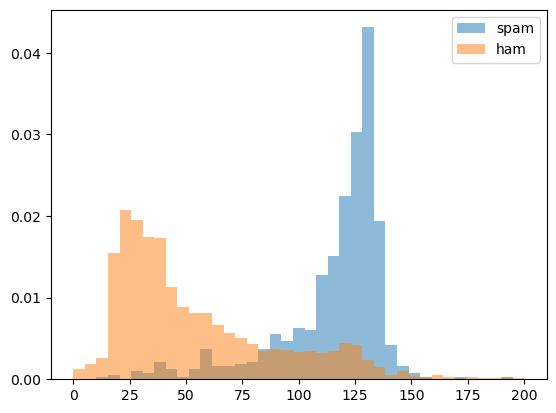

In [67]:
#plot a normalized histogram of the text_msg len

bins = np.linspace(0, 200, 40)

pyplot.hist(text_data[text_data['label'] == 'spam']['text_len'], bins, alpha=0.5, density=True, label='spam')
pyplot.hist(text_data[text_data['label'] == 'ham']['text_len'], bins, alpha=0.5, density=True, label='ham')    
pyplot.legend(loc='upper right')
pyplot.show()

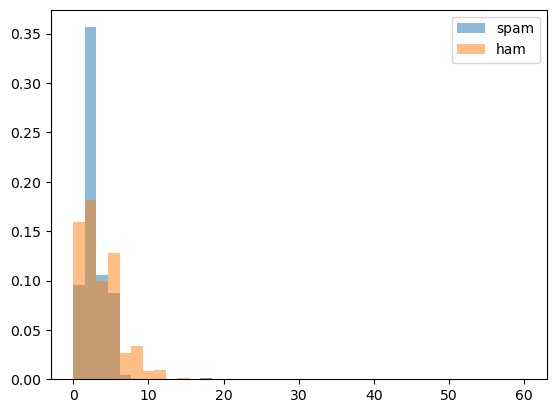

In [82]:
#plot a normalized histogram of the text_msg len

bins = np.linspace(0, 60, 40)

pyplot.hist(text_data[text_data['label'] == 'spam']['abbrv_text%'], bins, alpha=0.5, density=True, label='spam')
pyplot.hist(text_data[text_data['label'] == 'ham']['abbrv_text%'], bins, alpha=0.5, density=True, label='ham')    
pyplot.legend(loc='upper right')
pyplot.show()

In [145]:
print("Statistics of Spam\n",text_data[text_data['label'] == 'spam'].describe())
print("Statistics of Ham\n",text_data[text_data['label'] == 'ham'].describe())

Statistics of Spam
        text_punct%  abbrv_text%    text_len
count   746.000000   746.000000  746.000000
mean      4.899464     2.907507  115.717158
std       2.775120     1.497478   24.064101
min       0.000000     0.000000   12.000000
25%       3.000000     2.000000  109.000000
50%       5.000000     3.000000  124.000000
75%       6.000000     4.000000  131.000000
max      21.000000    17.000000  190.000000
Statistics of Ham
        text_punct%  abbrv_text%     text_len
count  4822.000000  4822.000000  4822.000000
mean      7.447740     3.548320    58.053297
std       6.993023     2.911907    47.086717
min       0.000000     0.000000     2.000000
25%       3.000000     2.000000    27.000000
50%       6.000000     3.000000    43.000000
75%      10.000000     5.000000    75.000000
max     100.000000    33.000000   740.000000


# Vectorizing The Data Set 

### TF-IDF

In [95]:
#Importing the vectorizer from sklearn 
from sklearn.feature_extraction.text import TfidfVectorizer

#We can achieve the cleaning and vectorizing in one step by using the analyzer

#instantiate our vectorizer
tfidf_vector = TfidfVectorizer(analyzer=clean_lem_text)

#fit and transform the text_msg of our data 
X_tfidf = tfidf_vector.fit_transform(text_data['text_msg'])

print(X_tfidf.shape)
print(tfidf_vector.get_feature_names_out())

(5568, 8914)
['' '0' '008704050406' ... 'ü' 'üll' '〨ud']


In [85]:
#take a sample so we can visualize 

text_data_sample = text_data[0:20]

#instantiate our vectorizer
tfidf_vector_sample = TfidfVectorizer(analyzer=clean_lem_text)

#fit and transform the text_msg of our data 
X_tfidf_sample = tfidf_vector_sample.fit_transform(text_data_sample['text_msg'])

print(X_tfidf_sample.shape)
print(tfidf_vector_sample.get_feature_names_out())


(20, 201)
['08002986030' '08452810075over18s' '09061701461' '1' '100' '100000' '11'
 '12' '150pday' '16' '2' '20000' '2005' '21st' '3' '4' '4403ldnw1a7rw18'
 '4txtú120' '6days' '81010' '87077' '87121' '87575' '9' '900' 'aft' 'aid'
 'already' 'anymore' 'apply' 'ard' 'around' 'b' 'blessing' 'breather'
 'brother' 'call' 'caller' 'callertune' 'camera' 'cash' 'chance' 'claim'
 'click' 'co' 'code' 'colour' 'comin' 'comp' 'copy' 'cost' 'credit'
 'cried' 'csh11' 'cup' 'customer' 'da' 'date' 'dont' 'eg' 'eh' 'england'
 'enough' 'entitled' 'entry' 'even' 'fa' 'feel' 'final' 'fine' 'finish'
 'first' 'free' 'friend' 'fulfil' 'go' 'goalsteam' 'going' 'gonna' 'gota'
 'granted' 'ha' 'help' 'hl' 'home' 'hour' 'httpwap' 'im' 'info' 'ive'
 'jackpot' 'joking' 'k' 'kim' 'kl341' 'lar' 'latest' 'lccltd' 'life'
 'like' 'link' 'lor' 'lunch' 'macedonia' 'make' 'may' 'melle' 'membership'
 'message' 'minnaminunginte' 'miss' 'mobile' 'month' 'nah' 'name'
 'national' 'naughty' 'network' 'news' 'next' 'nurungu' 'oh

In [86]:
#change the sparse matrix to array and convert it to data frame 
X_tfidf_df = pd.DataFrame(X_tfidf_sample.toarray())
X_tfidf_df.columns = tfidf_vector_sample.get_feature_names_out()
X_tfidf_df

,08002986030,08452810075over18s,09061701461,1,100,100000,11,12,150pday,16,...,winner,wkly,wonderful,wont,word,wwwdbuknet,xxxmobilemovieclub,xxxmobilemovieclubcomnqjkgighjjgcbl,yes,ü
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.238737,0.238737,0.209853,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.198986,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.198986,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.231645,0.000000,0.000000,0.000000,0.000000,0.231645,0.000000,0.000000,...,0.231645,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.197682,0.000000,0.000000,0.000000,0.000000,0.000000,0.197682,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.224905,0.000000,0.000000,0.000000,0.224905,0.197695,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


# Building a Basic Random Forest Model 

In [87]:
#Put it all together to build a random forest model 

#view the dataset
text_data.head()

,label,text_msg,clean_text,text_punct%,abbrv_text%,text_len
0,ham,I've been searching for the right words to tha...,"[ive, searching, right, word, thank, breather,...",3.0,3.0,160
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, 2, wkly, comp, win, fa, cup, fin...",5.0,2.0,128
2,ham,"Nah I don't think he goes to usf, he lives aro...","[nah, dont, think, go, usf, life, around, though]",4.0,6.0,49
3,ham,Even my brother is not like to speak with me. ...,"[even, brother, like, speak, treat, like, aid,...",3.0,0.0,62
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,"[date, sunday]",7.0,4.0,28


In [88]:
#Concatenate all the features and the tfidf vectors 
X_features = pd.concat([text_data['text_punct%'],
                        text_data['abbrv_text%'],
                        text_data['text_len'],
                        pd.DataFrame(X_tfidf.toarray())],
                       axis=1)
X_features.head()

,text_punct%,abbrv_text%,text_len,0,1,2,3,4,5,6,...,8904,8905,8906,8907,8908,8909,8910,8911,8912,8913
0,3.0,3.0,160,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5.0,2.0,128,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,6.0,49,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,0.0,62,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7.0,4.0,28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [92]:
#importing the RandomForrest Model  
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score

In [96]:
#saving the column names as string 
X_features.columns = X_features.columns.astype(str)

In [97]:
#instantiating our model and using default parameters and setting n_jobs=-1 
#to allow our model run faster by running individual decision tree simultaneouslly 
#using default hyper parameters n_stimators =10, max_depth=None

rf_model1 = RandomForestClassifier(n_jobs=-1)

#splitting the dataset into 5 sets with kfold
k_fold = KFold(n_splits=5)
#to run the model and generate the accuracy score 
cross_val_score(rf_model1, X_features, text_data['label'], cv=k_fold, scoring='accuracy', n_jobs=-1)

array([0.98025135, 0.97666068, 0.97396768, 0.96495957, 0.97124888])

In [3]:
from statistics import mean 
mean([0.98025135, 0.97666068, 0.97396768, 0.96495957, 0.97124888])

0.973417632

# RandomForestClassifier through Holdout Set

In [159]:
!pip install graphviz

!pip install pydot

     ---------------------------------------- 0.0/47.0 kB ? eta -:--:--
     ---------------------------------------- 47.0/47.0 kB 2.5 MB/s eta 0:00:00


In [160]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [98]:
#importing the precision recall f-call suport function from sklearn 
#importing train test split so we can split the data set and train our model
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split

In [147]:
#split the data into train set and test set 

X_train, X_test, y_train, y_test = train_test_split(X_features, text_data['label'], test_size=0.2)

In [148]:
#instantiating our models and setting the paramters 
#n_estimators default is 10, setting to 50 here 
#max_depth default was None setting to 20 here 
rf_class = RandomForestClassifier(n_estimators=50, max_depth=20, n_jobs=-1)
rf_model2 = rf_class.fit(X_train, y_train)

In [149]:
#combine the column name from X_train and Looking at the feature importance 
#to see what is important to the model
#sorting from highest to lowest and taking top 10

sorted(zip(rf_model2.feature_importances_,X_train.columns), reverse=True)[0:10]

[(0.06160042231210982, '1900'),
 (0.04537673829668321, 'text_len'),
 (0.036099166095035724, '8103'),
 (0.030520936920324558, '3422'),
 (0.021848823306278246, '7439'),
 (0.02042903297553563, '7751'),
 (0.019144534230640376, '5242'),
 (0.018530329622741516, '6255'),
 (0.01839281552857869, '8580'),
 (0.01614675123438427, '6918')]

In [150]:
#Making predictions with the model by passing the x_test data
y_pred = rf_model2.predict(X_test)
precision, recall, fscore, support = score(y_test, y_pred, pos_label='spam', average='binary')

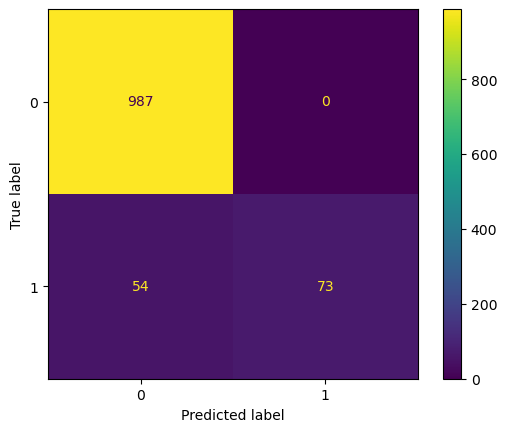

In [161]:

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [151]:
print("Precision", round(precision, 3), 
      "Recall", round(recall, 3), 
      "Accuracy", round((y_pred==y_test).sum() / len(y_pred),3))

Precision 1.0 Recall 0.575 Accuracy 0.952


# RandomForestClassifier with Grid Search

In [107]:
#Build a function to iterate through the hyper parameters so as to test what will work best with our model

def train_RFC(n_est, depth):
    rf_class = RandomForestClassifier(n_estimators=n_est, max_depth=depth, n_jobs=-1)
    rf_model3 = rf_class.fit(X_train, y_train)
    y_pred = rf_model3.predict(X_test)
    precision, recall, fscore, support = score(y_test, y_pred, pos_label='spam', average='binary')
    print('Est: {} / Depth: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
        n_est, depth, round(precision, 3), round(recall, 3),
        round((y_pred==y_test).sum() / len(y_pred), 3)))

In [108]:
#setting estimators to 10, 50, 100
#setting depth to 10, 20, 30

for n_est in [10, 50, 100]:
    for depth in [10, 20, 30, None]:
        train_RFC(n_est, depth)

Est: 10 / Depth: 10 ---- Precision: 1.0 / Recall: 0.271 / Accuracy: 0.899
Est: 10 / Depth: 20 ---- Precision: 1.0 / Recall: 0.606 / Accuracy: 0.945
Est: 10 / Depth: 30 ---- Precision: 1.0 / Recall: 0.729 / Accuracy: 0.962
Est: 10 / Depth: None ---- Precision: 0.992 / Recall: 0.806 / Accuracy: 0.972
Est: 50 / Depth: 10 ---- Precision: 1.0 / Recall: 0.232 / Accuracy: 0.893
Est: 50 / Depth: 20 ---- Precision: 1.0 / Recall: 0.639 / Accuracy: 0.95
Est: 50 / Depth: 30 ---- Precision: 1.0 / Recall: 0.755 / Accuracy: 0.966
Est: 50 / Depth: None ---- Precision: 1.0 / Recall: 0.884 / Accuracy: 0.984
Est: 100 / Depth: 10 ---- Precision: 1.0 / Recall: 0.265 / Accuracy: 0.898
Est: 100 / Depth: 20 ---- Precision: 1.0 / Recall: 0.645 / Accuracy: 0.951
Est: 100 / Depth: 30 ---- Precision: 1.0 / Recall: 0.781 / Accuracy: 0.969
Est: 100 / Depth: None ---- Precision: 1.0 / Recall: 0.871 / Accuracy: 0.982


# Evaluate Random Forest using cross validation
### Testing the model with two type of vectorization TFIDF and Count Vectorizer

In [109]:
#vectorizing our data set with count vectorizer 

count_vector = CountVectorizer(analyzer=clean_lem_text)
X_count = count_vector.fit_transform(text_data['text_msg'])
X_count_feat = pd.concat([text_data['text_punct%'],
                          text_data['abbrv_text%'],
                          text_data['text_len'], 
                          pd.DataFrame(X_count.toarray())], axis=1)

X_count_feat.head()

,text_punct%,abbrv_text%,text_len,0,1,2,3,4,5,6,...,8904,8905,8906,8907,8908,8909,8910,8911,8912,8913
0,3.0,3.0,160,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.0,2.0,128,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.0,6.0,49,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.0,0.0,62,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7.0,4.0,28,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [110]:
#saving the column names as string 
X_count_feat.columns = X_count_feat.columns.astype(str)

In [113]:
rfc = RandomForestClassifier()
param = {'n_estimators': [10, 50, 100, 150, 200, 300],
        'max_depth': [30, 60, 90, 120, 150, 200, None]}

gsCV = GridSearchCV(rfc, param, cv=5, n_jobs=-1)
gsCV_fit = gsCV.fit(X_features, text_data['label'])
pd.DataFrame(gsCV_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
20,30.181070,5.027548,0.874881,0.296381,120,100,"{'max_depth': 120, 'n_estimators': 100}",0.981149,0.980251,0.974865,0.968553,0.973944,0.975753,0.004588,1
27,45.538357,3.420660,1.533957,0.704021,150,150,"{'max_depth': 150, 'n_estimators': 150}",0.980251,0.976661,0.974865,0.971249,0.972147,0.975035,0.003242,2
13,20.549348,7.491907,0.418562,0.036398,90,50,"{'max_depth': 90, 'n_estimators': 50}",0.976661,0.977558,0.977558,0.966757,0.976640,0.975035,0.004159,3
38,31.083963,2.262539,0.970934,0.561851,None,100,"{'max_depth': None, 'n_estimators': 100}",0.977558,0.979354,0.976661,0.969452,0.970350,0.974675,0.004003,4
40,48.869437,3.022476,0.447910,0.050572,None,200,"{'max_depth': None, 'n_estimators': 200}",0.979354,0.978456,0.973070,0.967655,0.973046,0.974316,0.004244,5


In [146]:
rfc2 = RandomForestClassifier()
param = {'n_estimators': [10, 50, 100, 150, 200, 300],
        'max_depth': [30, 60, 90, 120, 150, 200, None]}

gsCV2 = GridSearchCV(rfc2, param, cv=5, n_jobs=-1)
gsCV2_fit = gsCV2.fit(X_count_feat, text_data['label'])
pd.DataFrame(gsCV2_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
22,57.064554,2.021908,1.296158,0.166596,120,200,"{'max_depth': 120, 'n_estimators': 200}",0.979354,0.975763,0.974865,0.968553,0.972147,0.974137,0.003620,1
37,17.836534,2.186561,0.562741,0.127488,None,50,"{'max_depth': None, 'n_estimators': 50}",0.980251,0.976661,0.973968,0.969452,0.969452,0.973957,0.004184,2
39,43.535509,1.674280,1.099791,0.131850,None,150,"{'max_depth': None, 'n_estimators': 150}",0.979354,0.974865,0.973070,0.967655,0.973944,0.973778,0.003749,3
16,54.456869,4.879359,1.461452,0.530188,90,200,"{'max_depth': 90, 'n_estimators': 200}",0.979354,0.975763,0.973070,0.967655,0.972147,0.973598,0.003886,4
29,88.032648,4.188122,1.500501,0.214248,150,300,"{'max_depth': 150, 'n_estimators': 300}",0.979354,0.975763,0.971275,0.967655,0.972147,0.973239,0.004000,5


## Final Model

In [ ]:
#split the data into train set and test set 
X_train, X_test, y_train, y_test = train_test_split(X_features, text_data['label'], test_size=0.2,random_state=7)

In [180]:
import time
#Final model selection

rf_class = RandomForestClassifier(n_estimators=200, max_depth=120, n_jobs=-1)

start = time.time()
rf_model_final = rf_class.fit(X_train, y_train)
end = time.time()
fit_time = (end - start)

start = time.time()
y_pred = rf_model_final.predict(X_test)
end = time.time()
pred_time = (end - start)

precision, recall, fscore, train_support = score(y_test, y_pred, pos_label='spam', average='binary')
print('Fit time: {} / Predict time: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
    round(fit_time, 3), round(pred_time, 3), round(precision, 3), round(recall, 3), round((y_pred==y_test).sum()/len(y_pred), 3)))

Fit time: 3.6 / Predict time: 0.181 ---- Precision: 1.0 / Recall: 0.902 / Accuracy: 0.988


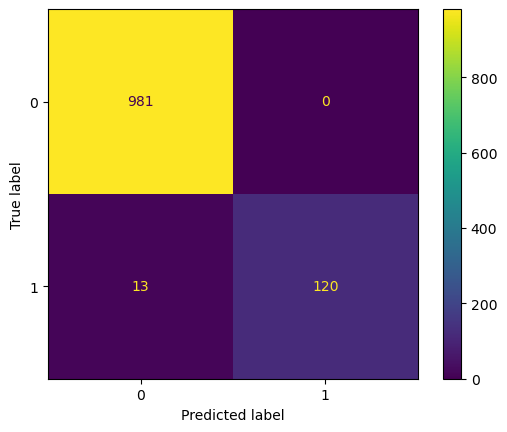

In [181]:

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();